<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/Final_Project_scooter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries
In this section, we import all the Python libraries needed for data loading, exploration, visualization, and modeling. These libraries will help us analyze the scooter rentals dataset and perform statistical and machine learning tasks.

In [ ]:
# Import the appropriate Python libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

## Load the Dataset
In this section, we load the scooter rentals dataset from a CSV file hosted online. The data is imported into a pandas dataframe so we can explore, analyze, and visualize it throughout the project.

In [ ]:
# Load the CSV file into a dataframe.
df_scooter_rentals = pd.read_csv('https://raw.githubusercontent.com/codymbaldwin/sample-files/master/scooter_rentals.csv')



## Dataset Dimensions
In this step, we check the dimensions of the dataset to see how many rows and columns it contains. This helps us understand the size of the data before performing further analysis.

In [ ]:
# Dimensions of the dataset.
df_scooter_rentals.shape

(731, 14)

## View Dataset Fields and Data Types
This step displays all the columns in the dataset along with their data types, non‑null counts, and memory usage. It helps us understand the structure of the data and identify any potential issues such as missing values or incorrect data types.

In [ ]:
# List all fields and their data types.
df_scooter_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


## Preview the First Few Rows of the Dataset
Before making any changes to the field names or performing deeper analysis, we preview the first few records of the dataset. This helps us understand the structure of the data and verify that it loaded correctly.

In [ ]:
# Preview the first few records of data before changing field names.
df_scooter_rentals.head()

,ID,date,yr,mnth,weekday,workday,season,holiday,temp,atemp,hum,wind,unregistered,registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


##Rename Columns for Clarity
The original dataset contains abbreviated or unclear column names. In this step, we rename several fields to more descriptive and readable names. This improves clarity and makes the dataset easier to work with during analysis and modeling.



In [ ]:
# Changing the field names.
df_scooter_rentals = df_scooter_rentals.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity_norm',
    'temp': 'temp_norm',
    'atemp': 'temp_felt_norm',
    'wind': 'wind_norm',
    'registered': 'rentals_registered',
    'unregistered': 'rentals_unregistered'
})

## Preview the First 5 Rows of the Dataset
Here we display the first five records of the dataset to get an initial look at the data after renaming the columns. This helps verify that the dataset loaded correctly and that the field names were updated as expected.



In [ ]:
# Preview the first 5 records of data.
df_scooter_rentals.head((5))

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


## Replace Season Codes with Descriptive Labels
The original dataset stores the season field as numeric codes (1–4). To make the data easier to understand and interpret, we replace these numeric values with descriptive season names such as winter, spring, summer, and fall.



In [ ]:
# Replacing the season field.
df_scooter_rentals['season'] = df_scooter_rentals['season'].replace({
    1: 'winter',
    2: 'spring',
    3: 'summer',
    4: 'fall'
})


## Create Total Rentals Column
To simplify analysis, we create a new column called rentals_total by adding together the registered and unregistered rental counts. This combined metric allows us to analyze overall scooter usage more easily and consistently throughout the project.


In [ ]:
# Creating a new "rentals_total" column and calculating the total.
df_scooter_rentals['rentals_total'] = df_scooter_rentals['rentals_registered'] + df_scooter_rentals['rentals_unregistered']

## Preview Updated Dataset After Adding rentals_total
Now that we have created the rentals_total column, we preview the first few rows again to confirm that the new field was added correctly and that the dataset reflects the updated structure.




In [ ]:
# Previewing a few records after calculating rentals_total column.
df_scooter_rentals.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Generate Descriptive Statistics
This step produces summary statistics for all numerical variables in the dataset, including measures such as mean, standard deviation, minimum, maximum, and quartiles. These statistics help us understand the overall distribution and central tendencies of the data.




In [ ]:
# Generate descriptive stats.
df_scooter_rentals.describe().round(2)

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.00,731.0,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.5,6.52,3.0,0.68,0.03,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.5,3.45,2.0,0.47,0.17,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.0,1.00,0.0,0.00,0.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.0,4.00,1.0,0.00,0.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,1.0,7.00,3.0,1.00,0.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,1.0,10.00,5.0,1.00,0.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,1.0,12.00,6.0,1.00,1.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


## Remove Missing Values
To ensure the dataset is clean and ready for analysis, we drop any rows containing missing values. This helps prevent errors in later steps such as visualization, statistical analysis, and model building.



In [ ]:
#Dropping missing values.
df_scooter_rentals = df_scooter_rentals.dropna()

##Distribution of Total Scooter Rentals
This visualization shows the distribution of the rentals_total variable. It helps us understand how scooter rentals are spread across different days, identify common rental levels, and detect any skewness or unusual patterns in the data.




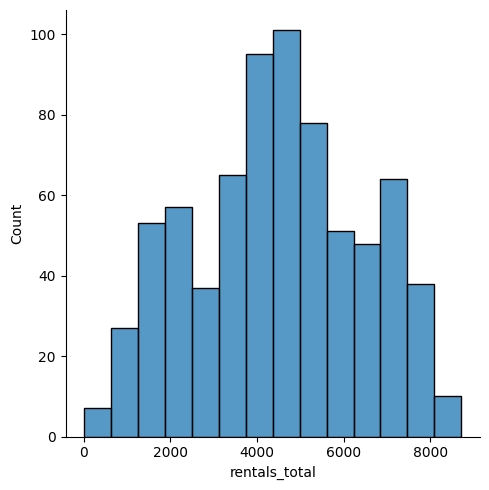

In [ ]:
# Show the distribution of scooter_rentals.
sns.displot(df_scooter_rentals, x="rentals_total")

This histogram shows how frequently different rental volumes occur across the dataset. The distribution is roughly normal, with most rental days clustering around 4,000 to 5,000 rentals. This central peak suggests a typical daily usage range, while the tails indicate occasional low- or high-demand days. Understanding this spread helps identify what “normal” rental activity looks like and sets the stage for detecting outliers or seasonal shifts in later visualizations.


## Scatterplot: Registered vs. Unregistered Rentals
This scatterplot visualizes the relationship between unregistered and registered scooter rentals. Each point represents a day, and the color indicates whether it was a workday or not. This helps us identify usage patterns across different user types and see how workdays influence rental behavior.



<Axes: xlabel='rentals_unregistered', ylabel='rentals_registered'>

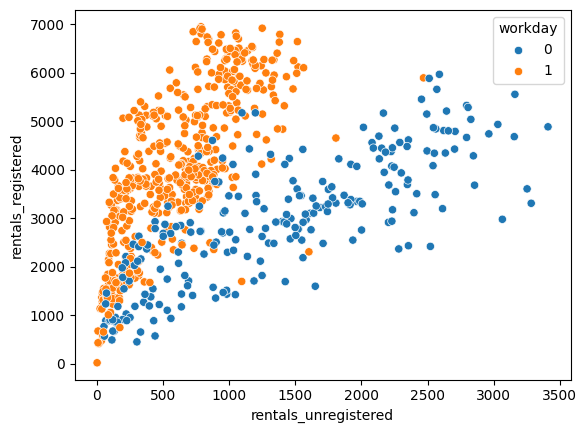

In [ ]:
# Create the scatterplot
sns.scatterplot(data=df_scooter_rentals,
                x="rentals_unregistered",
                y="rentals_registered",
                hue="workday")  # Color points by 'workday'


This scatterplot explores the relationship between registered and unregistered scooter rentals, with points color‑coded by workday status. On workdays (orange), we observe a clear trend toward higher registered rentals, suggesting that commuters or routine users dominate usage. In contrast, non‑workdays (blue) show more variability and lower registered counts, possibly reflecting casual or recreational riders. This pattern highlights how day type influences rental behavior and user segmentation.



## Swarmplot of Total Rentals by Season
This visualization shows how total scooter rentals vary across different seasons. Each point represents a day, allowing us to see the distribution, clustering, and spread of rental activity within each season. The swarmplot helps reveal seasonal patterns and potential differences in scooter usage throughout the year.



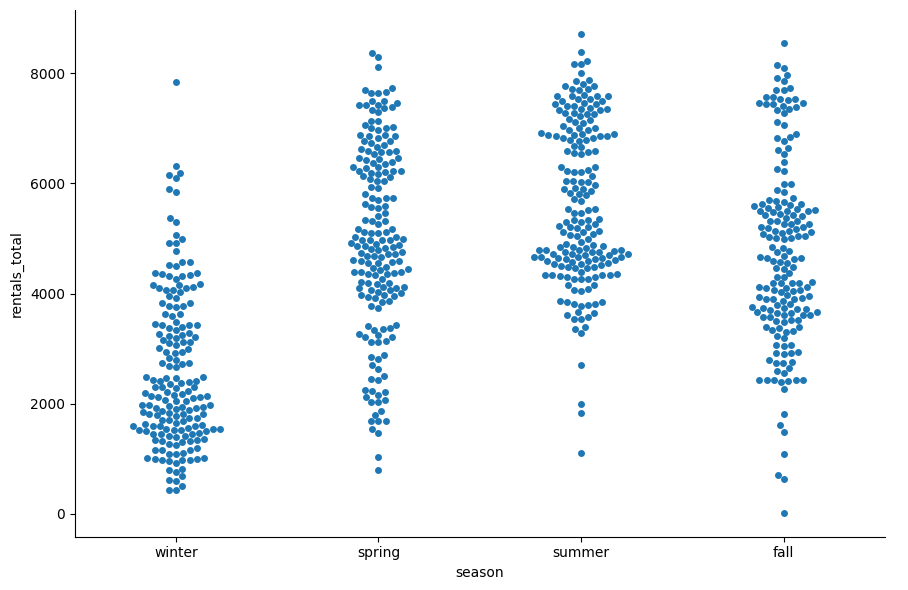

In [ ]:
# Create the swarmplot using catplot
sns.catplot(data=df_scooter_rentals,
            x="season",
            y="rentals_total",
            kind="swarm",  # Specify the plot type as 'swarm'
            height=6,     # Kept height as 6
            aspect=1.5)  # Kept aspect as 1.5


This scatterplot illustrates how scooter rental volumes vary across seasons. Summer shows consistently high rental activity, suggesting favorable weather conditions and increased outdoor mobility. Spring and fall display moderate usage with wider variability, possibly influenced by transitional weather. Winter has the lowest and most scattered rental counts, indicating reduced demand during colder months. These seasonal patterns reinforce the importance of temperature and daylight in shaping scooter usage behavior.


##Calculate Average Daily Rentals by Month and Year
To explore rental trends over time, we group the dataset by both month and year and compute the average number of total rentals for each group. This helps reveal seasonal patterns, year‑to‑year changes, and overall usage trends across the dataset.


In [ ]:
# Calculate average daily rentals for each month and year
# Assuming df_scooter_rentals has 'month' and 'year' columns
# First, group by month and year and calculate average rentals
avg_daily_rentals_df = df_scooter_rentals.groupby(['month', 'year'])['rentals_total'].mean().reset_index()

## Line Plot of Average Daily Rentals by Month and Year
This line plot shows how average daily scooter rentals change across the months, with separate lines for each year. It helps reveal seasonal patterns, compare rental trends between years, and identify periods of higher or lower scooter usage.


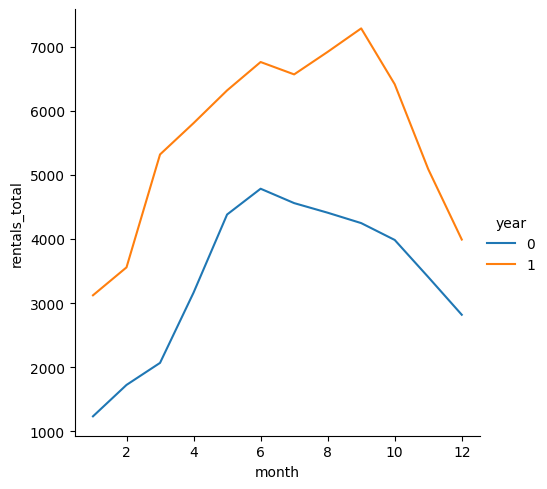

In [ ]:
# Create the line plot using relplot
sns.relplot(data=avg_daily_rentals_df, #Change to the dataframe
            x="month",
            y="rentals_total",
            hue="year",
            kind="line")


This line plot compares monthly scooter rental volumes across two different years. Both years show a clear seasonal pattern, with rentals rising from spring to summer and tapering off in fall and winter. Year 1 consistently outperforms Year 0, peaking around July (month 7), which may reflect improved weather, increased adoption, or external factors like policy changes or marketing efforts. The consistent seasonal curve suggests strong temperature‑driven demand, reinforcing earlier insights from the heatmap and scatterplots.


##  Select Variables for Pairplot Analysis
To explore relationships between weather‑related features and total scooter rentals, we select the relevant independent variables (temp_norm, temp_felt_norm, humidity_norm, wind_norm) along with the dependent variable (rentals_total). These columns are combined into a new dataframe that will be used to generate a pairplot for visualizing correlations and patterns.



In [ ]:
# Select the relevant columns for the pairplot
x_vars = ['temp_norm', 'temp_felt_norm', 'humidity_norm', 'wind_norm']  # Independent variables
y_vars = ['rentals_total']  # Dependent variable
data_for_pairplot = df_scooter_rentals[[*x_vars, *y_vars]] # combines both lists into one



## Pairplot with KDEs for Weather Features and Total Rentals
This pairplot uses kernel density estimates (KDEs) to visualize the relationships between weather‑related variables and total scooter rentals. KDE plots help reveal underlying distribution patterns and potential correlations, making it easier to understand how different weather conditions may influence rental activity.



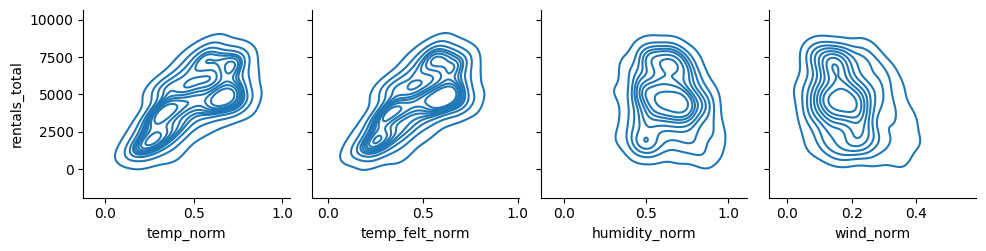

In [ ]:
# Create the pairplot with KDEs
sns.pairplot(data_for_pairplot, x_vars=x_vars, y_vars=y_vars, kind="kde")



##  Contour Plots of Environmental Factors vs. Total Rentals
These contour plots visualize how total scooter rentals vary with four normalized environmental variables: temperature, felt temperature, humidity, and wind.
- Temperature (temp_norm) and Felt Temperature (temp_felt_norm) show strong positive associations with rental volume. Higher values in these variables correspond to denser clusters of high rental activity, reinforcing the idea that warmer conditions drive usage.
- Humidity (humidity_norm) shows a weaker and less consistent relationship, with rentals spread across a wider range of humidity levels.
- Wind (wind_norm) appears to have minimal influence, with no clear density pattern linking wind intensity to rental volume.
These plots help confirm which environmental factors are most predictive of scooter demand and support the modeling choices made earlier.


## Select Variables for Correlation Heatmap
To examine how weather‑related features relate to total scooter rentals, we select the key numerical variables needed for the correlation heatmap. This subset includes rentals_total along with normalized temperature, felt temperature, humidity, and wind speed, allowing us to visualize their relationships in a clear and interpretable way.



In [ ]:
# Select the relevant columns for the heatmap
cols = ['rentals_total', 'temp_norm', 'temp_felt_norm', 'humidity_norm', 'wind_norm']
data_for_heatmap = df_scooter_rentals[cols]


## Calculate Correlations Between Total Rentals and Weather Variables
To understand how weather conditions relate to overall scooter usage, we compute the correlation values between rentals_total and each weather‑related feature. We extract only the correlations with rentals_total and drop its self‑correlation (which is always 1) to focus on meaningful relationships.


In [ ]:
# Calculate the correlation matrix of rentals_total and the weather indicators.
corr_matrix = data_for_heatmap.corr()[['rentals_total']].drop('rentals_total')
# added .drop to avoid correlation with itself(which is always 1)


## Heatmap of Correlations Between Total Rentals and Weather Variables
This heatmap visualizes the strength and direction of correlations between rentals_total and each weather‑related feature. The color scale highlights which conditions are most strongly associated with scooter usage, making it easier to identify meaningful patterns and potential drivers of rental behavior.


<Axes: >

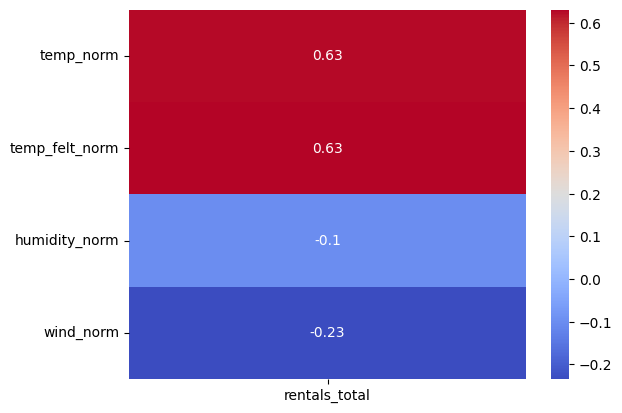

In [ ]:
# Create the heatmap with correlation coefficients
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


## Correlation Heatmap: Weather Variables vs. Total Rentals
This heatmap visualizes the strength and direction of correlations between normalized weather indicators and total scooter rentals.
- Temperature (temp_norm) and Felt Temperature (temp_felt_norm) show strong positive correlations (0.63), confirming that warmer conditions are closely linked to higher rental activity.
- Humidity (humidity_norm) has a weak negative correlation (−0.10), suggesting minimal impact on rental behavior.
- Wind (wind_norm) shows a slightly stronger negative correlation (−0.23), indicating that windier conditions may discourage scooter usage.
These insights reinforce the importance of temperature in predicting demand and help guide feature selection for modeling.


## Separate Independent and Dependent Variables
To prepare the data for modeling, we separate the predictor variable (temp_norm) from the target variable (rentals_total). This structure is required for fitting regression models and analyzing how temperature influences total scooter rentals.



In [ ]:
# Seperate dependent and independent variables
x= df_scooter_rentals[['temp_norm']] # Independent variable
y= df_scooter_rentals['rentals_total'] # Dependent variable


## Split Data into Training and Test Sets
To evaluate the performance of our regression model, we divide the dataset into training and test sets. The model is trained on 75% of the data and tested on the remaining 25%, allowing us to measure how well it generalizes to unseen observations.



In [ ]:
# Split the data into training and test sets. (25% test set)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Train the Linear Regression Model
We fit a linear regression model using the training data to learn the relationship between normalized temperature (temp_norm) and total scooter rentals. The model uses this pattern to make predictions on unseen data in later steps.



In [ ]:
# Train the prediction model using the training data.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Display the Regression Model Intercept
The intercept represents the predicted number of scooter rentals when the independent variable (temp_norm) is zero. This value serves as the baseline level of rentals before accounting for the effect of temperature in the linear model.




In [ ]:
# Display the y-intercept of our regression model.
# y = b + mx
print(model.intercept_.round(2))


1327.93


## Display the Coefficient for temp_norm
The coefficient represents how much the predicted number of scooter rentals changes for each one‑unit increase in normalized temperature. A positive value indicates that higher temperatures are associated with more rentals, while a negative value would indicate the opposite.



In [ ]:
# Get the coefficient for 'temp_norm'
temp_norm_coeff = model.coef_[0]  # 'temp_norm' is the first feature
print(temp_norm_coeff.round(2))

6463.97


## Manually Calculate Predicted Rentals Using the Regression Equation
Using the regression formula y=mx+b, we manually compute the predicted number of scooter rentals for a given normalized temperature value. Here, m is the coefficient for temp_norm, x is the chosen temperature value (0.30), and b is the model intercept.


In [ ]:
# Calculating the result
# y = mx+ b ; m = coefficient for temp_norm, x = independent variable(temp_norm), b = intercept, y= dependent variable(rentals_total)
rentals_total= (6463.97*0.30) + 1327.93

In [ ]:
rounded_rentals_total = round(rentals_total, 2)  # Round to 2 decimal places
print(rounded_rentals_total)

3267.12


## Generate Predictions on the Test Set
Using the trained regression model, we generate predicted scooter rental values for the test dataset. These predictions will later be compared to the actual values to evaluate how well the model generalizes to new, unseen data.




In [ ]:
# Make predictions in the test data.
y_pred = model.predict(x_test.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluate Model Performance Using R‑Squared
R‑squared measures how well the regression model explains the variability in total scooter rentals based on normalized temperature. A higher value indicates that the model captures more of the underlying relationship, while a lower value suggests limited predictive power.



In [ ]:
# Evaluate the performance of the model (r-squared).
r2 = metrics.r2_score(y_test, y_pred)  # Calculate R-squared
rounded_r2 = round(r2, 2)  # Round R-squared to 2 decimal places
print(rounded_r2)  # Print the rounded R-squared

0.38
